In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow.keras.utils as tku

In [5]:
tf.__version__

'2.11.0'

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('C:\\Users\\acer\\Downloads\\AI ML project\\MNIST\\training_set',
                                                 target_size = (28, 28),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 37340 images belonging to 10 classes.


In [7]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_set = train_datagen.flow_from_directory('C:\\Users\\acer\\Downloads\\AI ML project\\MNIST\\test_set',
                                                 target_size = (28, 28),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 4660 images belonging to 10 classes.


In [8]:
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[28, 28, 3]))

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [12]:
cnn.add(tf.keras.layers.Flatten())

In [13]:
cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [14]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [15]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
trained_model = cnn.fit(x = training_set, validation_data = test_set, epochs = 20)

Epoch 1/20
1167/1167 [==============================] - 180s 153ms/step - loss: 0.3446 - accuracy: 0.8893 - val_loss: 0.1656 - val_accuracy: 0.9494
Epoch 2/20
1167/1167 [==============================] - 104s 89ms/step - loss: 0.1437 - accuracy: 0.9561 - val_loss: 0.1178 - val_accuracy: 0.9629
Epoch 3/20
1167/1167 [==============================] - 90s 77ms/step - loss: 0.1065 - accuracy: 0.9660 - val_loss: 0.0871 - val_accuracy: 0.9738
Epoch 4/20
1167/1167 [==============================] - 97s 83ms/step - loss: 0.0907 - accuracy: 0.9724 - val_loss: 0.0764 - val_accuracy: 0.9749
Epoch 5/20
1167/1167 [==============================] - 149s 128ms/step - loss: 0.0743 - accuracy: 0.9762 - val_loss: 0.0718 - val_accuracy: 0.9768
Epoch 6/20
1167/1167 [==============================] - 100s 86ms/step - loss: 0.0662 - accuracy: 0.9791 - val_loss: 0.0709 - val_accuracy: 0.9766
Epoch 7/20
1167/1167 [==============================] - 85s 73ms/step - loss: 0.0612 - accuracy: 0.9809 - val_loss: 0.

In [17]:
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 64)                5

In [18]:
if(cnn.save('C:\\Users\\acer\\Downloads\\AI ML project\digit_recognition_system.h5')):
    print("model saved")


In [36]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:\\Users\\acer\\Downloads\\AI ML project\\MNIST\\single_prediction\img_3456.jpg', target_size = (28, 28))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
results = (cnn.predict(test_image))
training_set.class_indices
if results[0][0] == 1:
  prediction = 'Zero'
elif results[0][1] == 1:
  prediction = 'One'
elif results[0][2] == 1:
  prediction = 'Two'
elif results[0][3] == 1:
  prediction = 'Three'
elif results[0][4] == 1:
  prediction = 'Four'
elif results[0][5] == 1:
  prediction = 'Five'
elif results[0][6] == 1:
  prediction = 'Six'
elif results[0][7] == 1:
  prediction = 'Seven'
elif results[0][8] == 1:
  prediction = 'Eight'
else:
  prediction = 'Nine'


1/1 [==============================] - 0s 24ms/step


In [37]:
print(results)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [38]:
print(prediction)

Two


<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(28, 28, 3)


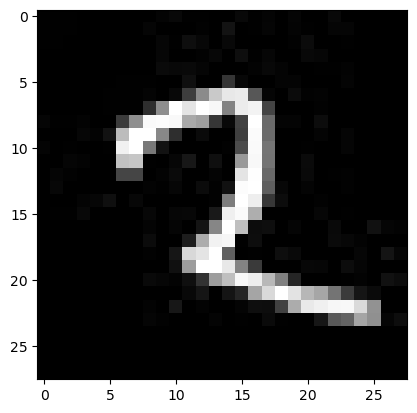

In [39]:
img_path = "C:\\Users\\acer\\Downloads\\AI ML project\\MNIST\\single_prediction\img_3456.jpg"
img = image.load_img(img_path, target_size=(28, 28))
print(type(img))

x = image.img_to_array(img)
print(type(x))
print(x.shape)
plt.imshow(x/255)